<a href="https://colab.research.google.com/github/WillianCella/ModelosDeAprendizadoSupervisionado2/blob/main/Trabalho_2_%E2%80%93_Modelos_de_Aprendizado_Supervisionado_RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#base = pd.read_csv("/content/drive/MyDrive/Shared/Concrete.csv")
base = pd.read_csv("/content/drive/MyDrive/Shared/auto-mpg2.csv", sep = ';')
print(base)
print(base.describe())

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
401  27.0          4         140.0        86.0    2790          15.6   
402  44.0          4          97.0        52.0    2130          24.6   
403  32.0          4         135.0        84.0    2295          11.6   
404  28.0          4         120.0        79.0    2625          18.6   
405  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin  car_brand            model  
0            70       1  chevrolet  chevelle malibu  
1            70       1    

In [ ]:
#separando os atributos
mpg = base.iloc[:,0].values # Milhas por galão
cilindros = base.iloc[:,1].values
deslocamento = base.iloc[:,2].values
hp = base.iloc[:,3].values
peso = base.iloc[:,4].values
aceleracao = base.iloc[:,5].values
anoModelo = base.iloc[:,6].values
origem = base.iloc[:,7].values
marca = base.iloc[:,8].values
modelo = base.iloc[:,9].values

print("MPG: ", mpg)

MPG:  [18.  15.  18.  16.  17.  15.  14.  14.  14.  15.   0.   0.   0.   0.
  0.  15.  14.   0.  15.  14.  24.  22.  18.  21.  27.  26.  25.  24.
 25.  26.  21.  10.  10.  11.   9.  27.  28.  25.  25.   0.  19.  16.
 17.  19.  18.  14.  14.  14.  14.  12.  13.  13.  18.  22.  19.  18.
 23.  28.  30.  30.  31.  35.  27.  26.  24.  25.  23.  20.  21.  13.
 14.  15.  14.  17.  11.  13.  12.  13.  19.  15.  13.  13.  14.  18.
 22.  21.  26.  22.  28.  23.  28.  27.  13.  14.  13.  14.  15.  12.
 13.  13.  14.  13.  12.  13.  18.  16.  18.  18.  23.  26.  11.  12.
 13.  12.  18.  20.  21.  22.  18.  19.  21.  26.  15.  16.  29.  24.
 20.  19.  15.  24.  20.  11.  20.  21.  19.  15.  31.  26.  32.  25.
 16.  16.  18.  16.  13.  14.  14.  14.  29.  26.  26.  31.  32.  28.
 24.  26.  24.  26.  31.  19.  18.  15.  15.  16.  15.  16.  14.  17.
 16.  15.  18.  21.  20.  13.  29.  23.  20.  23.  24.  25.  24.  18.
 29.  19.  23.  23.  22.  25.  33.  28.  25.  25.  26.  27.  17.5 16.
 15.5 14.5 22.

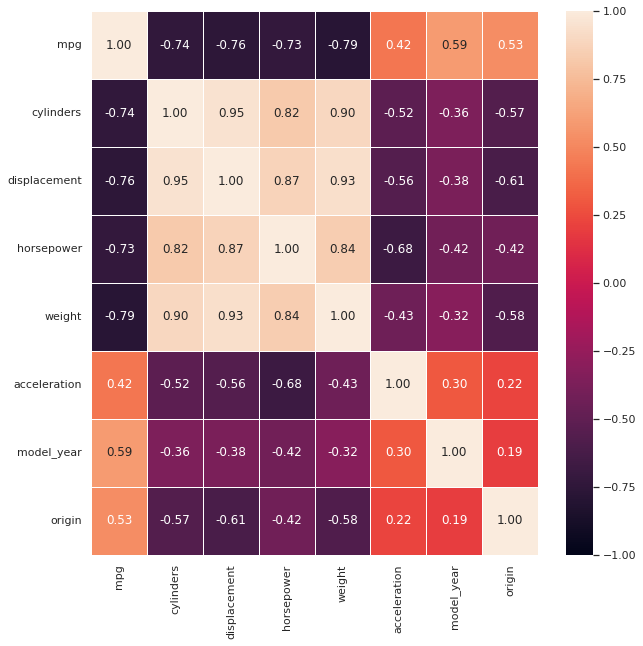

In [ ]:
#analisando o relacionamento entre as variáveis
plt.figure(figsize=(10, 10))
sn.set(font_scale=1)
sn.heatmap(base.corr(),annot=True,vmin=-1, vmax=1,linewidth=.5,fmt=".2f");
plt.show()

MPG
b em X:  184.31568922153855
a em X:  [-3.50463412]
Coef.Det.:  0.5280495842036811


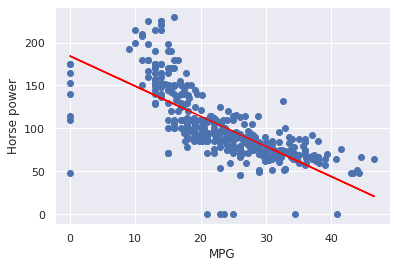

Cilindros
b em X:  -3.177189979772834
a em X:  [19.48850163]
Coef. Det.:  0.6780979070879454


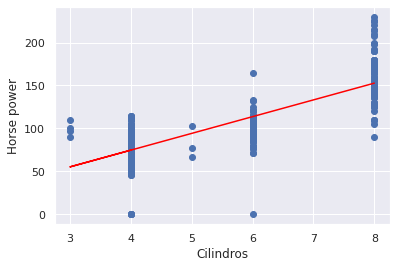

In [ ]:
#instanciando e treinando os modelos lineares
mpg = mpg.reshape(-1,1)
modelo1 = LinearRegression()
modelo1.fit(mpg,hp)

print ("MPG")
print ("b em X: ", modelo1.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo1.coef_) #obtendo a inclinação do modelo
print ("Coef.Det.: ",modelo1.score(mpg,hp)) #obtendo o coeficiente de determinação do modelo

plt.scatter(mpg,hp)
plt.xlabel("MPG") #variável explicativa
plt.ylabel("Horse power") #variável dependente
plt.plot(mpg, modelo1.predict(mpg),color='red') #plotando a reta do modelo
plt.show()


cilindros = cilindros.reshape(-1,1)
modelo2 = LinearRegression()
modelo2.fit(cilindros,hp)

print ("Cilindros")
print ("b em X: ", modelo2.intercept_) #obtendo o termo independente do modelo
print ("a em X: ", modelo2.coef_) #obtendo a inclinação do modelo
print ("Coef. Det.: ",modelo2.score(cilindros,hp)) #obtendo o coeficiente de determinação do modelo

plt.scatter(cilindros,hp)
plt.xlabel("Cilindros") #variável explicativa
plt.ylabel("Horse power") #variável dependente
plt.plot(cilindros, modelo2.predict(cilindros),color='red') #plotando a reta do modelo
plt.show()

In [ ]:
#realizando predições com base em variáveis individuais

#qual o HP de um carro com mpg 18
print("HP: ",modelo1.intercept_ + modelo1.coef_ * 18)

#qual a resistência do concreto com 360 kg de cimento
print("Resistência: ",modelo1.intercept_ - modelo1.coef_ * 360.0," MPa")

HP:  [121.23227502]
Resistência:  [1445.98397326]  MPa


In [ ]:
modelo1.intercept_

184.31568922153855

In [ ]:
modelo1.coef_

array([-3.50463412])